In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [23]:
# Read data from the CSV file
df = pd.read_csv("gld_price_data.csv")

In [24]:
# Display the first 7 rows of the dataset
df.head(7)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100


In [25]:
# Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
# Check for missing values in each column
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
# Calculate the correlation matrix
correlation = df.corr()

<ipython-input-27-ff582bf8c143>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

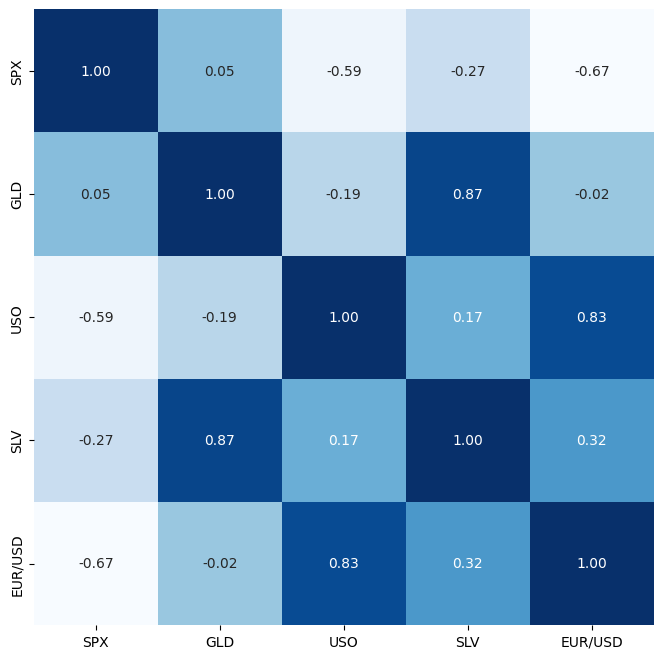

In [28]:
# Create a heatmap of the correlation matrix
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=False, fmt='.2f',annot=True, cmap='Blues')

In [29]:
# Prepare the features (X) and target variable (Y)
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [30]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.21, random_state=49)

In [31]:
# Define the model
rf = RandomForestRegressor()

In [36]:
# Define the desired parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8],
}

In [37]:
# Create a GridSearchCV using the model and parameters
rf_g = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [38]:
# Train the model using the training data
rf_g.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 300]})

In [39]:
# Get the best parameters and the best score
best_params = rf_g.best_params_
best_score = rf_g.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.9827174839647274


In [41]:
# Make predictions on the test data
y_pre = rf_g.predict(X_test)

In [42]:
# Evaluate the model's performance using R-squared score
error_score = metrics.r2_score(Y_test, y_pre)
print("R squared error : ", error_score)

R squared error :  0.9833737569859211


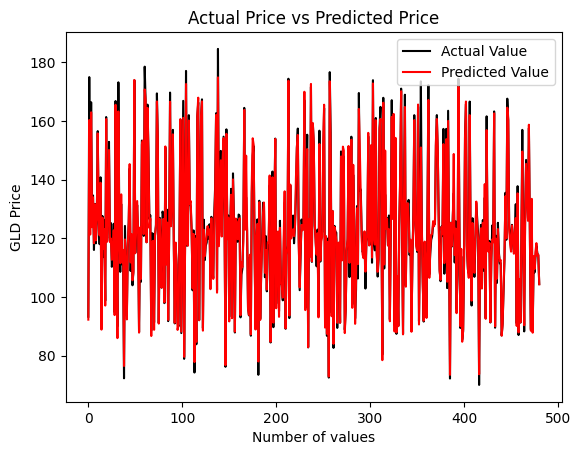

In [43]:
# Plot the actual vs. predicted GLD prices
Y_test = list(Y_test)
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(y_pre, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()